In [71]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [72]:
bag = rosbag.Bag('/home/uware/rosbags/static/rotation/25h9/s_yaw_25h9_2m_360_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [45,60,75]

In [73]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [74]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,38.027843
1,0.029865,38.519961
2,0.065807,38.534397
3,0.097561,39.115495
4,0.163651,39.467871
...,...,...
854,43.897625,-8.603749
855,43.931738,-8.530712
856,43.963962,-6.277467
857,43.997243,-5.140006


<AxesSubplot:xlabel='relative_time'>

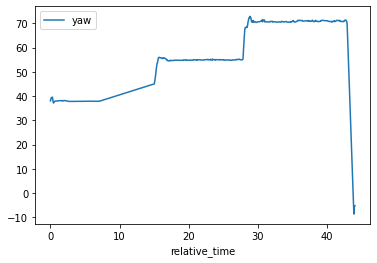

In [75]:
# initial graph
df.plot(x='relative_time', y=target)

In [76]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [77]:
# the amount of data points we are left with
len(x[peaks])

175

In [78]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

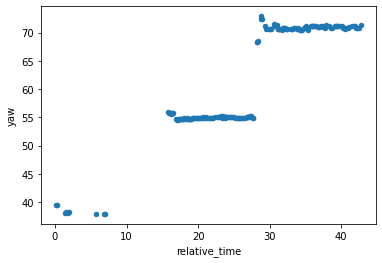

In [79]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [80]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.cut(df_filtered_by_targets[target], bins=len(input_vals), labels=input_vals)

In [81]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,relative_time,yaw,true_yaw
4,0.163651,39.467871,45
7,0.265630,39.560457,45
20,1.363591,38.141348,45
22,1.597026,38.181713,45
26,1.763985,38.125899,45
29,1.997712,38.199305,45
33,5.764339,37.902744,45
40,6.865149,37.911194,45
44,6.996102,37.897711,45
58,15.796652,55.986031,60


In [82]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [83]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [84]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.head(2)

,relative_time,yaw,true_yaw,error
4,0.163651,39.467871,45,5.532129
7,0.265630,39.560457,45,5.439543
58,15.796652,55.986031,60,4.013969
61,15.897733,55.797869,60,4.202131
424,28.230030,68.292311,75,6.707689
426,28.295641,68.281863,75,6.718137


In [85]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
45,9.0,6.623529,0.656742,5.439543,6.800695,6.858652,7.088806,7.102289
60,84.0,5.022113,0.272952,4.013969,4.953805,5.086745,5.185205,5.420396
75,82.0,4.112534,0.639772,2.118361,3.823088,4.132098,4.339616,6.718137


In [86]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

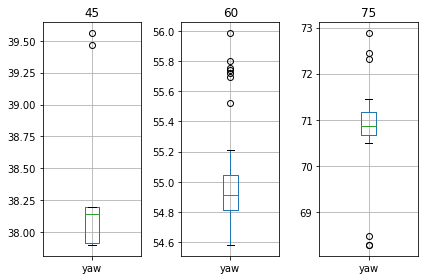

In [87]:
box_plotter(target)

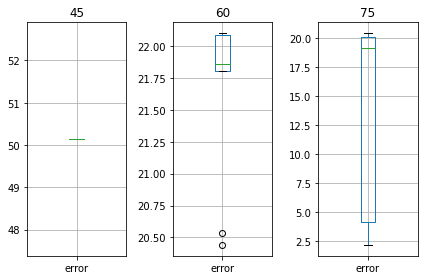

In [70]:
box_plotter('error')